# MusicRecommendationSystem

## Description

### Objective:
Developed a music recommendation system using unsupervised learning techniques to suggest songs based on user preferences and song characteristics. The system clusters similar songs using features like genre, tempo, mood, and acoustic properties.

### Tools Used:

Programming Language: Python
    
Libraries: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
    
Techniques: K-Means Clustering, Dimensionality Reduction (PCA, t-SNE)

### Approach:

#### Data Collection & Preprocessing:

Used a dataset containing song attributes such as tempo, danceability, energy, and genre. Cleaned the data by handling missing values and scaling numerical features for better clustering performance.

#### Feature Engineering:

Extracted relevant features from the dataset and performed normalization to standardize the song attributes. Applied dimensionality reduction techniques like PCA (Principal Component Analysis) to reduce feature space and improve clustering efficiency.

#### Modeling:

Applied the K-Means clustering algorithm to group songs with similar attributes. Tuned the number of clusters using the Elbow Method and Silhouette Score to find the optimal number of clusters.

#### Evaluation & Results:

Visualized the clusters using t-SNE to confirm the grouping of songs with similar characteristics. Evaluated the clustering results based on cohesion and separation of clusters. The model was able to recommend songs within the same cluster based on user preferences.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data=pd.read_csv("C:\\Users\\Tiger Syam\\Desktop\\IBM coursera\\UnsupervisedMl\\New folder\\Projects\\Clustering Music Genres\\Datasets\\Spotify-2000.csv")

In [3]:
data

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
data.drop('Index',axis=1,inplace=True)

In [6]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


#### Data Preprocessing

##### Handling Outliers

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [8]:
data.isnull().sum()

Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

no,null_values

##### Handling Duplicates

In [9]:
data.duplicated().sum()

0

##### EDA

In [10]:
cols=data.columns.tolist()
num_cols=data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=data.select_dtypes(include='object').columns.tolist()
cat_cols

['Title', 'Artist', 'Top Genre', 'Length (Duration)']

In [11]:
from sklearn.manifold import TSNE

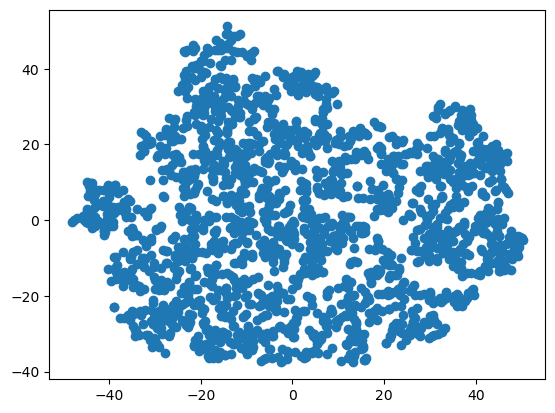

In [12]:
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(data[num_cols])
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.show()

In [13]:
data2=data[['Beats Per Minute (BPM)','Loudness (dB)','Liveness','Valence','Acousticness','Speechiness']]

In [14]:
tsne_data2=TSNE(n_components=2,random_state=0).fit_transform(data2)
tsne_data2

array([[ 24.641869 ,  37.8136   ],
       [-39.91774  , -11.749895 ],
       [-28.308424 ,  36.4563   ],
       ...,
       [  4.1953406,  41.26454  ],
       [ 18.260527 ,  33.241013 ],
       [ 16.331005 ,  -2.2087476]], dtype=float32)

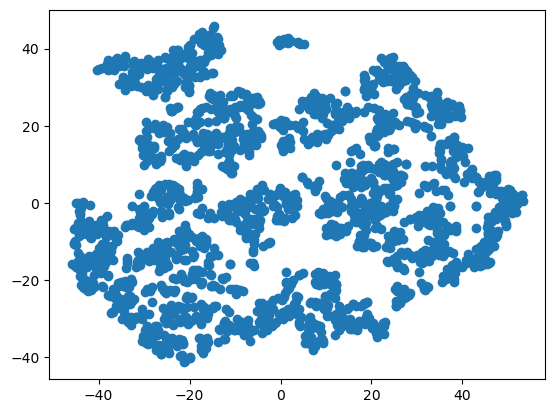

In [15]:
plt.scatter(tsne_data2[:,0],tsne_data2[:,1])
plt.show()

In [16]:
data.nunique()

Title                     1958
Artist                     731
Top Genre                  149
Year                        63
Beats Per Minute (BPM)     145
Energy                      98
Danceability                84
Loudness (dB)               23
Liveness                    94
Valence                     97
Length (Duration)          350
Acousticness               100
Speechiness                 37
Popularity                  81
dtype: int64

In [17]:
data.drop_duplicates('Title',keep='first',inplace=True)

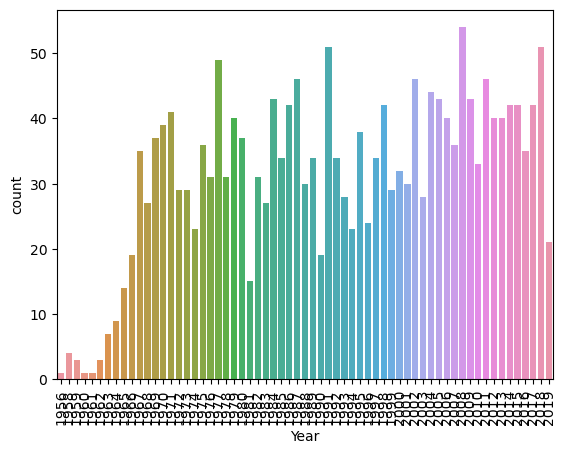

In [18]:
sns.countplot(x=data['Year'])
plt.xticks(rotation = 90)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
genre_count=CountVectorizer()
genre_count.fit(data['Top Genre'])

CountVectorizer()

In [21]:
genre_count.transform(data['Top Genre']).toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [23]:
pd.DataFrame(genre_count.transform(data['Top Genre']).toarray(),columns=genre_count.get_feature_names_out())


,acid,acoustic,adult,afropop,alaska,album,alternative,ambient,americana,and,...,soul,soundtrack,standards,stomp,streektaal,trance,uk,vocal,wave,yacht
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1954,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
song_vectorizer=CountVectorizer()
song_vectorizer.fit(data['Top Genre'])

CountVectorizer()

In [36]:
len(song_vectorizer.get_feature_names_out())

126

In [30]:
song_name='Sunrise'
text_array1=song_vectorizer.transform(data[data['Title']==song_name]['Top Genre']).toarray()
text_array1



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
song_vectorizer.transform(data[data['Title']==song_name]['Top Genre']).toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [58]:
def get_similarities(song_name,data):
    sim=[]
    text_array1=song_vectorizer.transform(data[data['Title']==song_name]['Top Genre']).toarray()
    num_array1=data[data['Title']==song_name].select_dtypes(include='number').to_numpy()
    for idx, row in data.iterrows():
        name = row['Title']
     
        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['Title']==name]['Top Genre']).toarray()
        num_array2 = data[data['Title']==name].select_dtypes(include='number').to_numpy()
 
        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
    
    return sim
    

In [59]:
get_similarities('Sunrise',data)

[2.0,
 0.998759514108069,
 0.9986725328413109,
 0.9981942725117896,
 0.9982059711047956,
 0.998020258013964,
 0.9983940019731543,
 0.9979972202670111,
 0.9981235462724686,
 0.9982624230559242,
 1.9994006103550537,
 0.998519515053517,
 0.9977663683085068,
 0.9976015229245274,
 0.9982862204758528,
 0.9995859673642734,
 0.9981900364174964,
 0.9984180131415232,
 0.9974513782564588,
 0.9987720286025233,
 0.9986609872984437,
 0.9987971250124259,
 0.9980641059542009,
 0.9982597793979014,
 0.998356633707174,
 0.9992408770937155,
 0.9985297565417154,
 0.9985396131989868,
 0.9995592447007866,
 0.9987486983717527,
 0.9996074764514378,
 0.9993157721586671,
 0.998566979812877,
 1.9993422433533041,
 0.9990547288965403,
 0.9991923003486776,
 0.9984994857664713,
 0.9981982207809926,
 0.9986045089894862,
 0.9987728723412096,
 0.9983950088867646,
 0.9982160984194973,
 0.9982745679355737,
 0.9980815760504852,
 0.9983491287212319,
 0.9985440256416281,
 0.998802860480113,
 0.9976094342913364,
 1.9985931611

In [62]:
def recommend_songs(song_name,data):
    if data[data['Title'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you have entered invalid_name. Some songs you may like:\n')
     
    for song in data.sample(n=5)['Title'].values:
        print(song)
    return

    data['Similarities']=get_similarities(song_name,data)
    data.sort_values(by=['Similarities','Popularity'],ascending=[False,False],inplace=True)
    
    display(data[['Title','Artist']])

    

In [64]:
recommend_songs('Sunrise',data)

Dancing with Tears in My Eyes
Whatever It Takes
Lust For Life
The Wind Cries Mary
Wêr Bisto


In [66]:
recommend_songs('Shape of You',data)

Gangsta's Paradise
Happier
Mijn Van Straat Geredde Roos
Big in Japan
You Don't Bring Me Flowers


In [67]:
recommend_songs('Love me like you do',data)

This song is either not so popular or you have entered invalid_name. Some songs you may like:

If You Don't Know Me by Now - 2008 Remaster
White Flag
Make Me Smile (Come up and See Me) - 2014 Remaster
An End Has a Start
Roadhouse Blues
